<a href="https://colab.research.google.com/github/007khun159/Deeplaern_py/blob/main/Artificail_Neural_Network/Basic_function1.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pandas.core.common import random_state
#Workshop 5 MLP จำแนกผลไม้
# m = mass
# d = diameter



# if they are fruit it will 1 
# if they are not  fruit it will 0


import numpy as np
import pandas as pd 
import seaborn as sns
import  matplotlib.pyplot as plt


path ='/content/drive/MyDrive/datasets/fruit2class.csv'
df = pd.read_csv(path)
df.head(8)
df.sample(7)
df.sample(6,random_state=1)





,m,d,target
3,6.6,3.2,0
7,7.0,4.8,1
6,8.2,4.4,1
2,6.5,5.5,0
10,8.9,5.2,0
4,6.9,5.9,0


In [2]:
 df.target.unique() # check class 1 0 

array([0, 1])

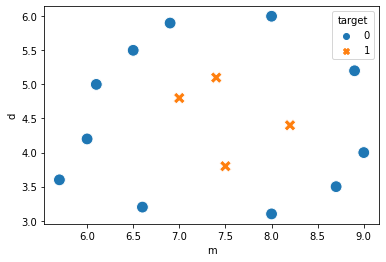

In [3]:
sns.scatterplot(x='m',y='d',data= df,hue='target',style = 'target',s = 140)
plt.show()

In [4]:
#Prepare data 
X = df.drop('target',axis =1)
y=df.target

In [5]:
#ปรับค่าของ Feature ให้เป็นค่า Stadard scale

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X) #Train X
y_train = y

In [6]:
df.sample(6,random_state=1) # ก่อน



,m,d,target
3,6.6,3.2,0
7,7.0,4.8,1
6,8.2,4.4,1
2,6.5,5.5,0
10,8.9,5.2,0
4,6.9,5.9,0


In [7]:
df_sc =pd.DataFrame(X_train,columns = ['d','m'])
df_sc['target'] = y_train
df_sc.sample(6,random_state=1)

,d,m,target
3,-0.736514,-1.398477,0
7,-0.352246,0.340562,1
6,0.800559,-0.094198,1
2,-0.832581,1.101391,0
10,1.473028,0.775322,0
4,-0.448313,1.536151,0


In [8]:
from sklearn.neural_network import MLPClassifier


# hidden = 100(defult)
model  = MLPClassifier(random_state=1) #randomstate
model.fit(X_train,y_train)


print('Score {:.4f}'.format(model.score(X_train,y_train)))
print('actual',np.array(y))
print('predicted',model.predict(X_train))

Score 0.7333
actual [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0]
predicted [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [9]:
from sklearn.metrics import classification_report, confusion_matrix


y_predic = model.predict(X_train)
print('Score --> {:.4f}'.format(model.score(X_train,y_train)))
print(confusion_matrix(y_train,y_predic))

Score --> 0.7333
[[11  0]
 [ 4  0]]


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


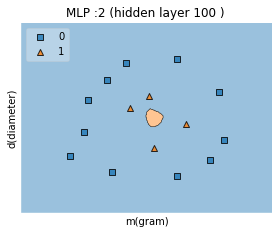

In [13]:
from mlxtend.plotting import plot_decision_regions
hidden = 100
plt.figure(figsize=(4.5,3.5))

plot_decision_regions(X_train , np.array(y_train),clf = model,legend=2)
plt.title("MLP :2 (hidden layer {} ) ".format(hidden))      
plt.xticks([])
plt.yticks([])
plt.xlabel('m(gram)')
plt.ylabel('d(diameter)')
plt.show()

In [11]:
#เช็คจำนวนของ NN 
[coef.shape for coef in model.coefs_]

[(2, 100), (100, 1)]

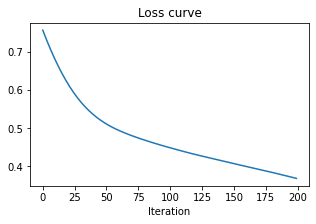

In [12]:
#Plot ค่า Loss curve 1


plt.figure(figsize = (5,3))
plt.title('Loss curve')
plt.xlabel('Iteration')
plt.plot(model.loss_curve_)
plt.show()

In [14]:
#เพิ่มจำนวนรอบของการ train
#เริ่มมีการทำนายที่ถูกต้องบางส่วนหลังจากเพิ่มรอบ
iter = 2000
model = MLPClassifier(max_iter= iter , random_state=1)

model.fit(X_train,y_train)


print('Score {:.4f}'.format(model.score(X_train,y_train)))
print('actual',np.array(y))
print('predicted',model.predict(X_train))

Score 1.0000
actual [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0]
predicted [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0]


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


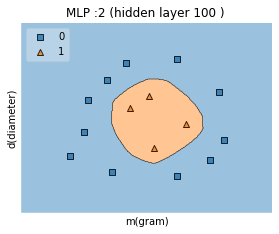

In [15]:
#Plot
from mlxtend.plotting import plot_decision_regions
hidden = 100
plt.figure(figsize=(4.5,3.5))

plot_decision_regions(X_train , np.array(y_train),clf = model,legend=2)
plt.title("MLP :2 (hidden layer {} ) ".format(hidden))      
plt.xticks([])
plt.yticks([])
plt.xlabel('m(gram)')
plt.ylabel('d(diameter)')
plt.show()

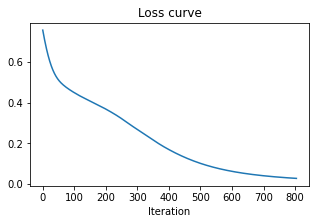

In [16]:
#Plot ค่า Loss curve 


plt.figure(figsize = (5,3))
plt.title('Loss curve')
plt.xlabel('Iteration')
plt.plot(model.loss_curve_)
plt.show()

In [23]:
#ทำการลองปรับ hidden layer 150

#เพิ่มจำนวนรอบของการ train
#เริ่มมีการทำนายที่ถูกต้องบางส่วนหลังจากเพิ่มรอบ
iter = 200
hidden =150 

model  = MLPClassifier(hidden_layer_sizes=(hidden),max_iter=(iter),random_state=1)

model.fit(X_train,y_train)


print('Score {:.4f}'.format(model.score(X_train,y_train)))
print('actual',np.array(y))
print('predicted',model.predict(X_train))
#พลาดไป 2 จุด

#actual [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0]
#predicted [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0]

Score 0.8667
actual [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0]
predicted [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0]


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


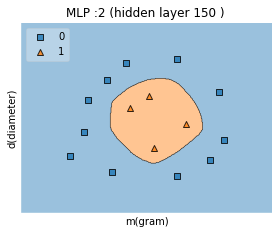

In [22]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(4.5,3.5))

plot_decision_regions(X_train , np.array(y_train),clf = model,legend=2)
plt.title("MLP :2 (hidden layer {} ) ".format(hidden))      
plt.xticks([])
plt.yticks([])
plt.xlabel('m(gram)')
plt.ylabel('d(diameter)')
plt.show()

In [24]:
#ลองลดจำนวน hidden layer ลง
iter = 2000
hidden =4 

model  = MLPClassifier(hidden_layer_sizes=(hidden),max_iter=(iter),random_state=1)

model.fit(X_train,y_train)


print('Score {:.4f}'.format(model.score(X_train,y_train)))
print('actual',np.array(y))
print('predicted',model.predict(X_train))
#ตรงกันได้ในที่สุด 


Score 1.0000
actual [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0]
predicted [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0]


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
[coef.shape for coef in model.coefs_]
#จำนวนของ รอบและ hidden

[(2, 4), (4, 1)]